In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_15204\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [6]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [7]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [8]:
df.shape

(994879, 4)

In [9]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [10]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

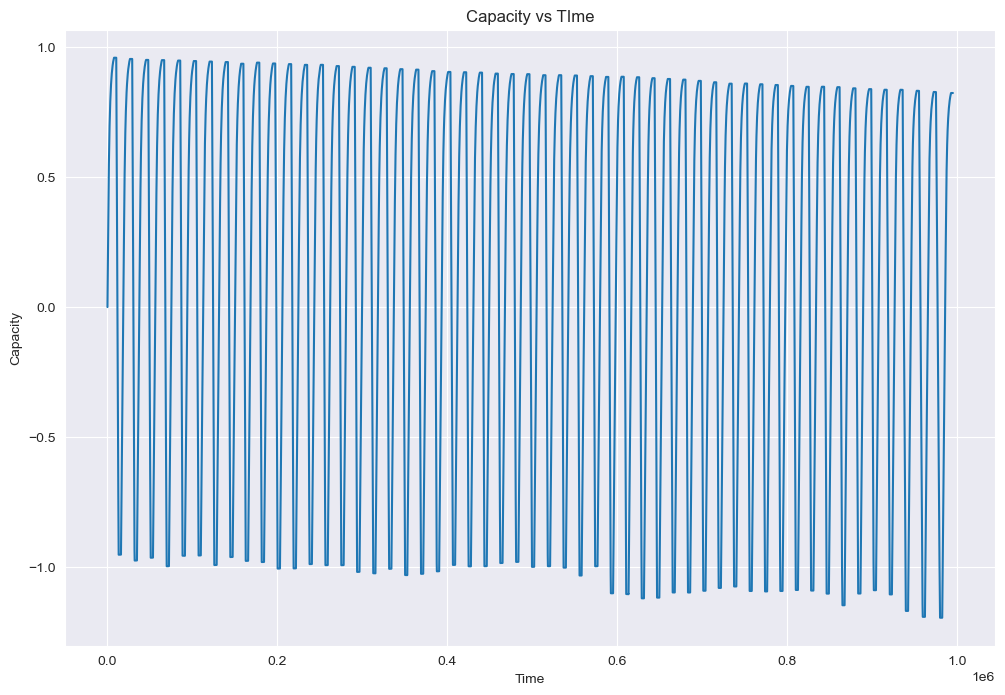

In [12]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Local Maxima and Minima

In [16]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

df.Capacity.plot(figsize=(20,12), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [17]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [ ]:
print(maximum_point)
print(maximum_point.max())
print(minimum_point)

In [18]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [19]:
df.head(20)

,Time,Potential,Current,Capacity,SOC,Charge
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338
5,5.0,3.95467,1.24789,0.001624,0.001692,5.84639
6,6.0,3.95637,1.24791,0.001995,0.002078,7.18165
7,7.0,3.95793,1.24789,0.002321,0.002417,8.35467
8,8.0,3.95938,1.24790,0.002692,0.002804,9.68992
9,9.0,3.96077,1.24789,0.003017,0.003143,10.86290


# Integral current

In [20]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

df.loc[:, "Integral_current"] = integral

Text(0.5, 1.0, 'Dataset')

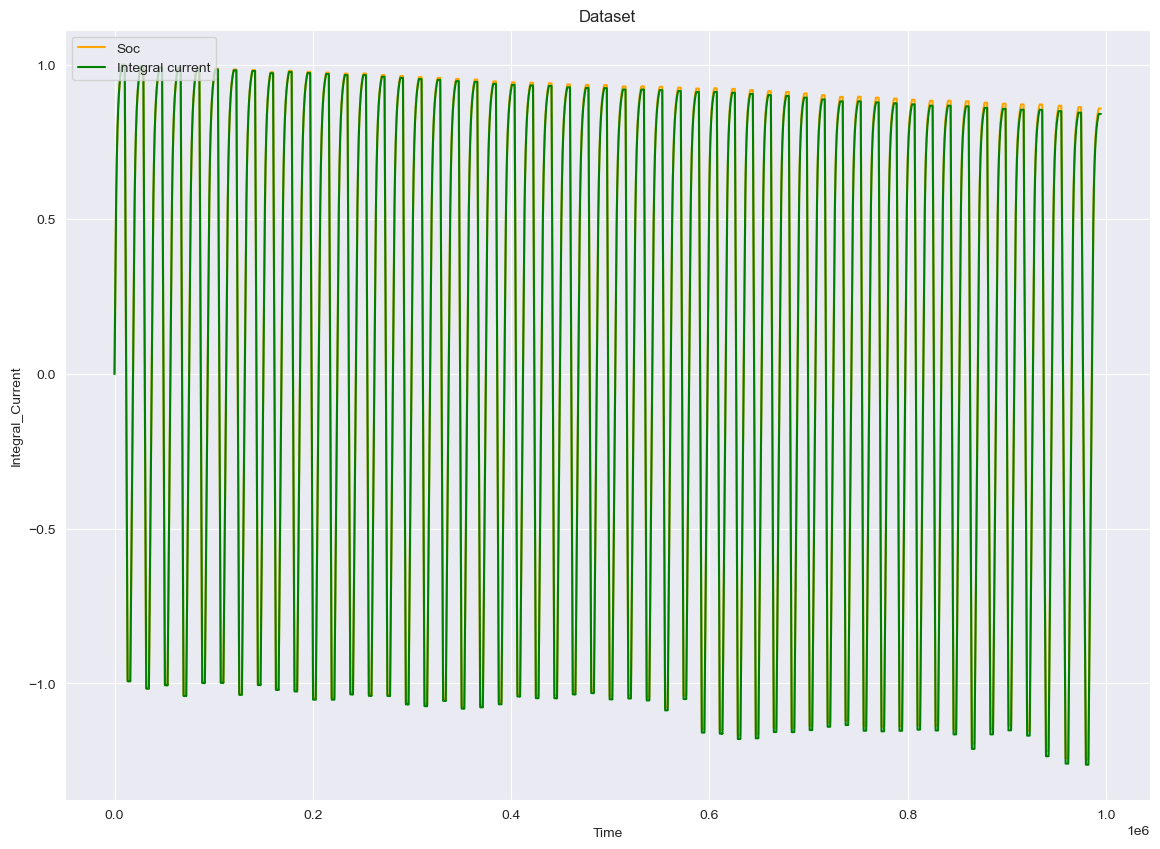

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_current'],color='green')
plt.ylabel('Integral_Current')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [22]:
df.head()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000,0.000000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737,0.000181
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510,0.000542
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812,0.000903
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338,0.001264


In [23]:
df.insert(loc = 5,column ='Power',value=df['Current']*df["Potential"])

In [24]:
df.describe()

,Time,Potential,Current,Capacity,SOC,Power,Charge,Integral_current
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622,0.285109,527.461697,0.142881
std,288767.217690,0.382038,1.142440,0.752569,0.783926,3.993079,2709.247496,0.784457
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881,-9.777741,-4302.310000,-1.262688
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745,0.000000,-2169.485000,-0.637721
50%,501905.600000,4.147310,0.072232,0.455186,0.474152,0.303331,1638.670000,0.464311
75%,751231.300000,4.199370,0.795196,0.839904,0.874900,3.339343,3023.655000,0.862360
max,999999.600000,4.199950,1.364510,0.959319,0.999291,5.730082,3453.550000,0.999371


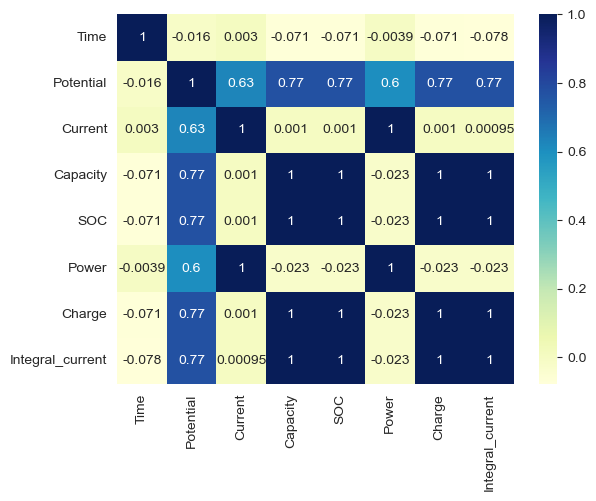

<Figure size 1400x1000 with 0 Axes>

In [25]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Capacity','Charge','SOC','Integral_current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [27]:
df.head()

,Time,Potential,Current,Capacity,SOC,Power,Charge,Integral_current
0,0.000000e+00,0.822158,0.969868,0.554717,0.554717,4.919672,0.554717,0.558203
1,5.000005e-07,0.824159,0.969847,0.554823,0.554823,4.922976,0.554823,0.558283
2,1.500001e-06,0.826242,0.969850,0.554996,0.554996,4.926784,0.554996,0.558443
3,2.500002e-06,0.828049,0.969850,0.555148,0.555148,4.930054,0.555148,0.558602
4,3.500003e-06,0.829519,0.969850,0.555320,0.555320,4.932712,0.555320,0.558762


In [28]:
Y = df.pop('Power')
X = df

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [30]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 7), (198976, 7), (795903,), (198976,))

In [31]:
X_train.head()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
937136,0.942247,0.465316,0.144855,0.548993,0.548993,0.548993,0.544839
349336,0.352410,0.201613,0.000171,0.294816,0.294816,0.294816,0.297118
461383,0.465490,0.202316,0.000235,0.333728,0.333728,0.333728,0.334814
827759,0.832847,0.163459,0.000538,0.124506,0.124506,0.124506,0.124425
755188,0.760261,0.188361,0.000274,0.140677,0.140677,0.140677,0.140842


In [32]:
Y_train.head()

937136   -6.654122
349336   -7.613976
461383   -7.615768
827759   -7.471321
755188   -7.564694
Name: Power, dtype: float64

In [33]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:

callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

# AIC Function

In [36]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):
    # model = model_1

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

# Modeling

In [37]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(70,activation = 'linear'),
                               tf.keras.layers.Dense(50, activation = 'linear'),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=128,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 18s 3ms/step - loss: 0.2323 - rmse: 0.4760 - mae: 0.2323 - mse: 0.2266 - mape: 42418708.0000 - val_loss: 0.2013 - val_rmse: 0.3269 - val_mae: 0.2013 - val_mse: 0.1069 - val_mape: 24282706.0000
Epoch 2/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.1997 - rmse: 0.3085 - mae: 0.1997 - mse: 0.0952 - mape: 35817876.0000 - val_loss: 0.2039 - val_rmse: 0.2912 - val_mae: 0.2039 - val_mse: 0.0848 - val_mape: 47357548.0000
Epoch 3/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.1985 - rmse: 0.3076 - mae: 0.1985 - mse: 0.0946 - mape: 35266132.0000 - val_loss: 0.2009 - val_rmse: 0.2931 - val_mae: 0.2009 - val_mse: 0.0859 - val_mape: 43006060.0000
Epoch 4/100
6218/6218 [==============================] - 17s 3ms/step - loss: 0.1977 - rmse: 0.3073 - mae: 0.1977 - mse: 0.0944 - mape: 34819080.0000 - val_loss: 0.1992 - val_rmse: 0.3089 - val_mae: 0.1992 - val_mse: 0.0954 - val_mape: 41710452.0000


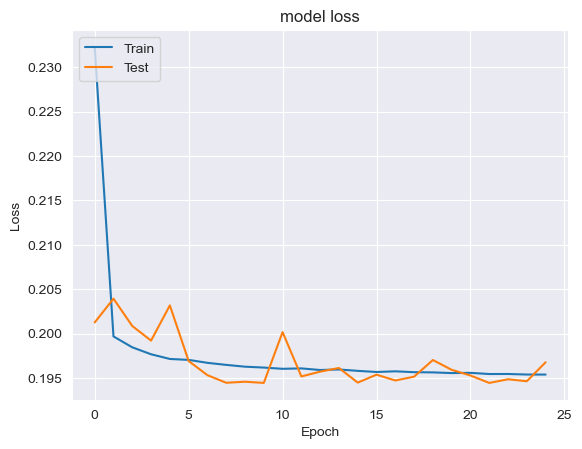

In [38]:
plot_his(history_1)

In [39]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.1968 - rmse: 0.3112 - mae: 0.1968 - mse: 0.0968 - mape: 26669498.0000


[0.19678978621959686,
 0.3111917972564697,
 0.19678978621959686,
 0.09684033691883087,
 26669498.0]

In [40]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [41]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                560       
                                                                 
 dense_1 (Dense)             (None, 50)                3550      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,151
Trainable params: 5,151
Non-trainable params: 0
_________________________________________________________________


In [116]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  10330.902


# Model 2

In [42]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.0372 - rmse: 0.2535 - mae: 0.0372 - mse: 0.0642 - mape: 6960722.5000 - val_loss: 0.0133 - val_rmse: 0.0251 - val_mae: 0.0133 - val_mse: 6.3220e-04 - val_mape: 1842675.6250
Epoch 2/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.0115 - rmse: 0.0234 - mae: 0.0115 - mse: 5.4851e-04 - mape: 1560854.6250 - val_loss: 0.0100 - val_rmse: 0.0219 - val_mae: 0.0100 - val_mse: 4.7858e-04 - val_mape: 1120884.5000
Epoch 3/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0094 - rmse: 0.0208 - mae: 0.0094 - mse: 4.3394e-04 - mape: 1068327.7500 - val_loss: 0.0088 - val_rmse: 0.0200 - val_mae: 0.0088 - val_mse: 3.9839e-04 - val_mape: 843894.1875
Epoch 4/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0085 - rmse: 0.0197 - mae: 0.0085 - mse: 3.8896e-04 - mape: 803653.5000 - val_loss: 0.0081 - val_rmse: 0.0195 - val_mae: 0.0081 - val_mse: 3.7968e-04

Epoch 33/100
24872/24872 [==============================] - 66s 3ms/step - loss: 0.0057 - rmse: 0.0140 - mae: 0.0057 - mse: 1.9696e-04 - mape: 293199.8438 - val_loss: 0.0057 - val_rmse: 0.0139 - val_mae: 0.0057 - val_mse: 1.9302e-04 - val_mape: 296107.5312
Epoch 34/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.0057 - rmse: 0.0140 - mae: 0.0057 - mse: 1.9502e-04 - mape: 290523.3438 - val_loss: 0.0057 - val_rmse: 0.0138 - val_mae: 0.0057 - val_mse: 1.9174e-04 - val_mape: 296147.3438
Epoch 35/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0057 - rmse: 0.0139 - mae: 0.0057 - mse: 1.9326e-04 - mape: 287322.6562 - val_loss: 0.0057 - val_rmse: 0.0137 - val_mae: 0.0057 - val_mse: 1.8843e-04 - val_mape: 283415.5312
Epoch 36/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0056 - rmse: 0.0138 - mae: 0.0056 - mse: 1.9141e-04 - mape: 285844.7500 - val_loss: 0.0057 - val_rmse: 0.0136 - val_mae: 0.0057 - val_mse: 1.8614e

Epoch 65/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.0051 - rmse: 0.0125 - mae: 0.0051 - mse: 1.5568e-04 - mape: 240146.0625 - val_loss: 0.0050 - val_rmse: 0.0124 - val_mae: 0.0050 - val_mse: 1.5321e-04 - val_mape: 235570.3594
Epoch 66/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.0050 - rmse: 0.0124 - mae: 0.0050 - mse: 1.5467e-04 - mape: 239563.5625 - val_loss: 0.0050 - val_rmse: 0.0124 - val_mae: 0.0050 - val_mse: 1.5344e-04 - val_mape: 233400.6875
Epoch 67/100
24872/24872 [==============================] - 49s 2ms/step - loss: 0.0050 - rmse: 0.0124 - mae: 0.0050 - mse: 1.5400e-04 - mape: 238317.3125 - val_loss: 0.0050 - val_rmse: 0.0123 - val_mae: 0.0050 - val_mse: 1.5174e-04 - val_mape: 232999.5000
Epoch 68/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0050 - rmse: 0.0124 - mae: 0.0050 - mse: 1.5300e-04 - mape: 237283.6250 - val_loss: 0.0050 - val_rmse: 0.0123 - val_mae: 0.0050 - val_mse: 1.5111e

Epoch 97/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0047 - rmse: 0.0116 - mae: 0.0047 - mse: 1.3397e-04 - mape: 212830.2344 - val_loss: 0.0047 - val_rmse: 0.0115 - val_mae: 0.0047 - val_mse: 1.3312e-04 - val_mape: 212665.2500
Epoch 98/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0047 - rmse: 0.0116 - mae: 0.0047 - mse: 1.3357e-04 - mape: 212472.9375 - val_loss: 0.0047 - val_rmse: 0.0115 - val_mae: 0.0047 - val_mse: 1.3258e-04 - val_mape: 225620.5781
Epoch 99/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0046 - rmse: 0.0115 - mae: 0.0046 - mse: 1.3309e-04 - mape: 211154.6719 - val_loss: 0.0046 - val_rmse: 0.0115 - val_mae: 0.0046 - val_mse: 1.3210e-04 - val_mape: 207798.5469
Epoch 100/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0046 - rmse: 0.0115 - mae: 0.0046 - mse: 1.3258e-04 - mape: 211089.2500 - val_loss: 0.0046 - val_rmse: 0.0114 - val_mae: 0.0046 - val_mse: 1.3107

In [44]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 0.0046 - rmse: 0.0114 - mae: 0.0046 - mse: 1.3107e-04 - mape: 211517.2812


[0.004633091390132904,
 0.01144863199442625,
 0.004633091390132904,
 0.00013107116683386266,
 211517.28125]

In [45]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


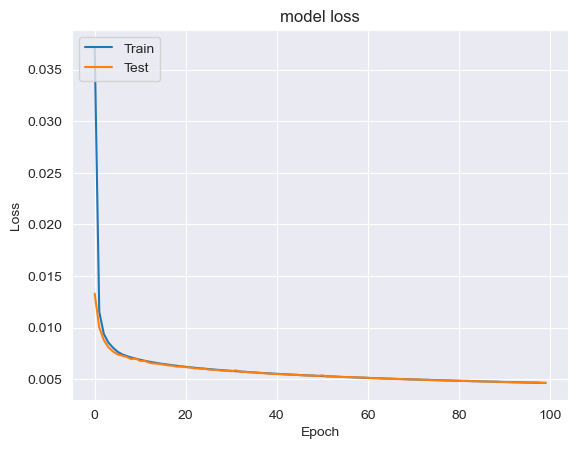

In [49]:
plot_his(history_2)

In [46]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  11830.345


# Model 3

In [50]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train,batch_size=128, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.1132 - rmse: 0.4500 - mae: 0.1132 - mse: 0.2025 - mape: 27291186.0000 - val_loss: 0.0786 - val_rmse: 0.0983 - val_mae: 0.0786 - val_mse: 0.0097 - val_mape: 18620998.0000
Epoch 2/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0330 - rmse: 0.0556 - mae: 0.0330 - mse: 0.0031 - mape: 7688462.0000 - val_loss: 0.0280 - val_rmse: 0.0478 - val_mae: 0.0280 - val_mse: 0.0023 - val_mape: 6365000.0000
Epoch 3/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.0256 - rmse: 0.0489 - mae: 0.0256 - mse: 0.0024 - mape: 6093415.0000 - val_loss: 0.0222 - val_rmse: 0.0431 - val_mae: 0.0222 - val_mse: 0.0019 - val_mape: 5061365.0000
Epoch 4/100
6218/6218 [==============================] - 13s 2ms/step - loss: 0.0204 - rmse: 0.0443 - mae: 0.0204 - mse: 0.0020 - mape: 4558980.5000 - val_loss: 0.0284 - val_rmse: 0.0476 - val_mae: 0.0284 - val_mse: 0.0023 - val_mape: 6700134.5000
Epoch 

6218/6218 [==============================] - 15s 2ms/step - loss: 0.0028 - rmse: 0.0110 - mae: 0.0028 - mse: 1.2193e-04 - mape: 400018.2812 - val_loss: 0.0025 - val_rmse: 0.0111 - val_mae: 0.0025 - val_mse: 1.2416e-04 - val_mape: 213065.8125
Epoch 34/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.0028 - rmse: 0.0110 - mae: 0.0028 - mse: 1.2140e-04 - mape: 398715.5625 - val_loss: 0.0024 - val_rmse: 0.0111 - val_mae: 0.0024 - val_mse: 1.2369e-04 - val_mape: 181581.1562
Epoch 35/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.0027 - rmse: 0.0110 - mae: 0.0027 - mse: 1.2058e-04 - mape: 384915.2500 - val_loss: 0.0024 - val_rmse: 0.0111 - val_mae: 0.0024 - val_mse: 1.2312e-04 - val_mape: 385718.7188
Epoch 36/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.0027 - rmse: 0.0110 - mae: 0.0027 - mse: 1.2033e-04 - mape: 373956.9688 - val_loss: 0.0028 - val_rmse: 0.0111 - val_mae: 0.0028 - val_mse: 1.2300e-04 - val_mape: 34423

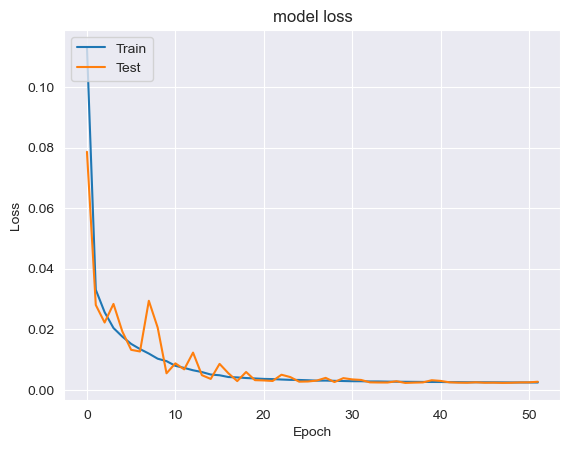

In [51]:
plot_his(history_3)

In [52]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 0.0027 - rmse: 0.0112 - mae: 0.0027 - mse: 1.2536e-04 - mape: 512771.9062


[0.002662552520632744,
 0.011196419596672058,
 0.002662552520632744,
 0.000125359816593118,
 512771.90625]

In [53]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [54]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  9290.354


# Model 4

In [55]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 62s 2ms/step - loss: 0.0331 - rmse: 0.2091 - mae: 0.0331 - mse: 0.0437 - mape: 9040997.0000 - val_loss: 0.0133 - val_rmse: 0.0316 - val_mae: 0.0133 - val_mse: 9.9924e-04 - val_mape: 4405999.0000
Epoch 2/100
24872/24872 [==============================] - 58s 2ms/step - loss: 0.0105 - rmse: 0.0286 - mae: 0.0105 - mse: 8.1865e-04 - mape: 3578984.2500 - val_loss: 0.0094 - val_rmse: 0.0280 - val_mae: 0.0094 - val_mse: 7.8430e-04 - val_mape: 3194647.7500
Epoch 3/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0091 - rmse: 0.0267 - mae: 0.0091 - mse: 7.1318e-04 - mape: 3112092.5000 - val_loss: 0.0099 - val_rmse: 0.0267 - val_mae: 0.0099 - val_mse: 7.1323e-04 - val_mape: 3312292.7500
Epoch 4/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0083 - rmse: 0.0258 - mae: 0.0083 - mse: 6.6478e-04 - mape: 2834576.5000 - val_loss: 0.0078 - val_rmse: 0.0257 - val_mae: 0.0078 - val_mse: 6.5820e-

Epoch 33/100
24872/24872 [==============================] - 83s 3ms/step - loss: 0.0044 - rmse: 0.0187 - mae: 0.0044 - mse: 3.4789e-04 - mape: 1615693.5000 - val_loss: 0.0044 - val_rmse: 0.0183 - val_mae: 0.0044 - val_mse: 3.3589e-04 - val_mape: 1599447.8750
Epoch 34/100
24872/24872 [==============================] - 69s 3ms/step - loss: 0.0044 - rmse: 0.0186 - mae: 0.0044 - mse: 3.4490e-04 - mape: 1606444.3750 - val_loss: 0.0044 - val_rmse: 0.0182 - val_mae: 0.0044 - val_mse: 3.3294e-04 - val_mape: 1651924.2500
Epoch 35/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0043 - rmse: 0.0185 - mae: 0.0043 - mse: 3.4227e-04 - mape: 1596506.6250 - val_loss: 0.0043 - val_rmse: 0.0182 - val_mae: 0.0043 - val_mse: 3.3030e-04 - val_mape: 1631603.2500
Epoch 36/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0043 - rmse: 0.0184 - mae: 0.0043 - mse: 3.3946e-04 - mape: 1587394.6250 - val_loss: 0.0043 - val_rmse: 0.0181 - val_mae: 0.0043 - val_mse: 

Epoch 65/100
24872/24872 [==============================] - 92s 4ms/step - loss: 0.0036 - rmse: 0.0170 - mae: 0.0036 - mse: 2.8833e-04 - mape: 1382171.8750 - val_loss: 0.0036 - val_rmse: 0.0167 - val_mae: 0.0036 - val_mse: 2.7845e-04 - val_mape: 1340725.6250
Epoch 66/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0036 - rmse: 0.0169 - mae: 0.0036 - mse: 2.8695e-04 - mape: 1375157.1250 - val_loss: 0.0036 - val_rmse: 0.0166 - val_mae: 0.0036 - val_mse: 2.7692e-04 - val_mape: 1355636.3750
Epoch 67/100
24872/24872 [==============================] - 74s 3ms/step - loss: 0.0036 - rmse: 0.0169 - mae: 0.0036 - mse: 2.8563e-04 - mape: 1367812.8750 - val_loss: 0.0036 - val_rmse: 0.0166 - val_mae: 0.0036 - val_mse: 2.7537e-04 - val_mape: 1369714.0000
Epoch 68/100
24872/24872 [==============================] - 74s 3ms/step - loss: 0.0036 - rmse: 0.0169 - mae: 0.0036 - mse: 2.8427e-04 - mape: 1360776.7500 - val_loss: 0.0036 - val_rmse: 0.0166 - val_mae: 0.0036 - val_mse: 

Epoch 97/100
24872/24872 [==============================] - 73s 3ms/step - loss: 0.0031 - rmse: 0.0159 - mae: 0.0031 - mse: 2.5248e-04 - mape: 1045337.6875 - val_loss: 0.0030 - val_rmse: 0.0156 - val_mae: 0.0030 - val_mse: 2.4318e-04 - val_mape: 1062428.6250
Epoch 98/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0030 - rmse: 0.0159 - mae: 0.0030 - mse: 2.5169e-04 - mape: 1034590.2500 - val_loss: 0.0030 - val_rmse: 0.0156 - val_mae: 0.0030 - val_mse: 2.4230e-04 - val_mape: 1029989.2500
Epoch 99/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0030 - rmse: 0.0158 - mae: 0.0030 - mse: 2.5076e-04 - mape: 1023289.2500 - val_loss: 0.0030 - val_rmse: 0.0155 - val_mae: 0.0030 - val_mse: 2.4152e-04 - val_mape: 1026313.8750
Epoch 100/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0030 - rmse: 0.0158 - mae: 0.0030 - mse: 2.4988e-04 - mape: 1010499.9375 - val_loss: 0.0030 - val_rmse: 0.0155 - val_mae: 0.0030 - val_mse:

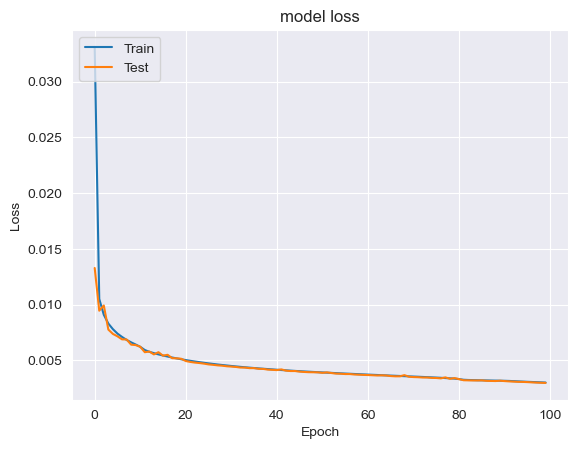

In [56]:
plot_his(history_4)

In [57]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 9s 1ms/step - loss: 0.0030 - rmse: 0.0155 - mae: 0.0030 - mse: 2.4062e-04 - mape: 997997.3750


[0.0029730338137596846,
 0.015511885285377502,
 0.0029730338137596846,
 0.00024061859585344791,
 997997.375]

In [58]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [59]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  24370.354


# Model 5

In [60]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 201s 8ms/step - loss: 0.1255 - rmse: 0.4251 - mae: 0.1255 - mse: 0.1807 - mape: 26049636.0000 - val_loss: 0.0611 - val_rmse: 0.1054 - val_mae: 0.0611 - val_mse: 0.0111 - val_mape: 12430152.0000
Epoch 2/50
24872/24872 [==============================] - 196s 8ms/step - loss: 0.0520 - rmse: 0.0922 - mae: 0.0520 - mse: 0.0085 - mape: 12232060.0000 - val_loss: 0.0369 - val_rmse: 0.0783 - val_mae: 0.0369 - val_mse: 0.0061 - val_mape: 8199858.5000
Epoch 3/50
24872/24872 [==============================] - 196s 8ms/step - loss: 0.0404 - rmse: 0.0745 - mae: 0.0404 - mse: 0.0055 - mape: 9398071.0000 - val_loss: 0.0431 - val_rmse: 0.0677 - val_mae: 0.0431 - val_mse: 0.0046 - val_mape: 10658034.0000
Epoch 4/50
24872/24872 [==============================] - 196s 8ms/step - loss: 0.0324 - rmse: 0.0592 - mae: 0.0324 - mse: 0.0035 - mape: 7196008.5000 - val_loss: 0.0274 - val_rmse: 0.0497 - val_mae: 0.0274 - val_mse: 0.0025 - val_mape: 5497359.5

Epoch 33/50
24872/24872 [==============================] - 196s 8ms/step - loss: 0.0038 - rmse: 0.0074 - mae: 0.0038 - mse: 5.4179e-05 - mape: 806765.5625 - val_loss: 0.0040 - val_rmse: 0.0074 - val_mae: 0.0040 - val_mse: 5.4681e-05 - val_mape: 794145.6250
Epoch 34/50
24872/24872 [==============================] - 197s 8ms/step - loss: 0.0037 - rmse: 0.0072 - mae: 0.0037 - mse: 5.1847e-05 - mape: 787077.2500 - val_loss: 0.0063 - val_rmse: 0.0087 - val_mae: 0.0063 - val_mse: 7.5752e-05 - val_mape: 1490442.0000
Epoch 35/50
24872/24872 [==============================] - 196s 8ms/step - loss: 0.0036 - rmse: 0.0071 - mae: 0.0036 - mse: 4.9925e-05 - mape: 778407.2500 - val_loss: 0.0029 - val_rmse: 0.0067 - val_mae: 0.0029 - val_mse: 4.5348e-05 - val_mape: 574004.9375
Epoch 36/50
24872/24872 [==============================] - 196s 8ms/step - loss: 0.0036 - rmse: 0.0069 - mae: 0.0036 - mse: 4.8043e-05 - mape: 760149.5000 - val_loss: 0.0030 - val_rmse: 0.0067 - val_mae: 0.0030 - val_mse: 4.4459

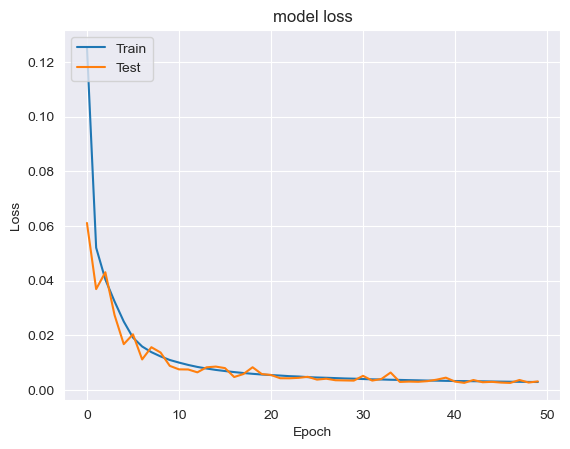

In [61]:
plot_his(history_5)

In [62]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 21s 3ms/step - loss: 0.0031 - rmse: 0.0058 - mae: 0.0031 - mse: 3.4066e-05 - mape: 783430.0625


[0.0031090329866856337,
 0.005836633499711752,
 0.0031090329866856337,
 3.4066288208123296e-05,
 783430.0625]

In [63]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 19s 3ms/step


In [65]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25730.342


# Model 6

In [66]:
%%time
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 229s 9ms/step - loss: 0.1156 - rmse: 0.4339 - mae: 0.1156 - mse: 0.1882 - mape: 23947124.0000 - val_loss: 0.0696 - val_rmse: 0.1005 - val_mae: 0.0696 - val_mse: 0.0101 - val_mape: 19282008.0000
Epoch 2/40
24872/24872 [==============================] - 232s 9ms/step - loss: 0.0410 - rmse: 0.0755 - mae: 0.0410 - mse: 0.0057 - mape: 9559412.0000 - val_loss: 0.0283 - val_rmse: 0.0554 - val_mae: 0.0283 - val_mse: 0.0031 - val_mape: 7664046.0000
Epoch 3/40
24872/24872 [==============================] - 233s 9ms/step - loss: 0.0248 - rmse: 0.0429 - mae: 0.0248 - mse: 0.0018 - mape: 5886050.5000 - val_loss: 0.0144 - val_rmse: 0.0245 - val_mae: 0.0144 - val_mse: 5.9831e-04 - val_mape: 2669175.5000
Epoch 4/40
24872/24872 [==============================] - 234s 9ms/step - loss: 0.0157 - rmse: 0.0246 - mae: 0.0157 - mse: 6.0350e-04 - mape: 3698695.5000 - val_loss: 0.0133 - val_rmse: 0.0201 - val_mae: 0.0133 - val_mse: 4.0419e-04 - val_mape:

Epoch 33/40
24872/24872 [==============================] - 239s 10ms/step - loss: 0.0027 - rmse: 0.0049 - mae: 0.0027 - mse: 2.3862e-05 - mape: 656244.7500 - val_loss: 0.0021 - val_rmse: 0.0044 - val_mae: 0.0021 - val_mse: 1.9153e-05 - val_mape: 514821.0938
Epoch 34/40
24872/24872 [==============================] - 245s 10ms/step - loss: 0.0027 - rmse: 0.0048 - mae: 0.0027 - mse: 2.2782e-05 - mape: 638443.8750 - val_loss: 0.0029 - val_rmse: 0.0047 - val_mae: 0.0029 - val_mse: 2.2424e-05 - val_mape: 670352.3750
Epoch 35/40
24872/24872 [==============================] - 235s 9ms/step - loss: 0.0026 - rmse: 0.0047 - mae: 0.0026 - mse: 2.1777e-05 - mape: 621906.2500 - val_loss: 0.0026 - val_rmse: 0.0044 - val_mae: 0.0026 - val_mse: 1.9545e-05 - val_mape: 601273.2500
Epoch 36/40
24872/24872 [==============================] - 239s 10ms/step - loss: 0.0026 - rmse: 0.0046 - mae: 0.0026 - mse: 2.1082e-05 - mape: 614800.6250 - val_loss: 0.0027 - val_rmse: 0.0047 - val_mae: 0.0027 - val_mse: 2.18

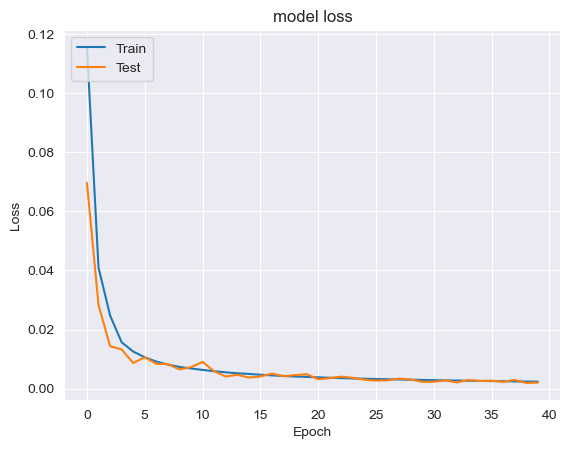

In [67]:
plot_his(history_6)

In [68]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 25s 4ms/step - loss: 0.0020 - rmse: 0.0039 - mae: 0.0020 - mse: 1.5512e-05 - mape: 467436.8438


[0.0020276112481951714,
 0.003938560839742422,
 0.0020276112481951714,
 1.5512261597905308e-05,
 467436.84375]

In [69]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_20 (Dense)            (None, 20)                620       
                                                                 
 dense_21 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [70]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 23s 4ms/step


In [71]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65870.34


# Model 7

In [72]:
%%time
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 62s 9ms/step - loss: 0.2800 - rmse: 0.7834 - mae: 0.2800 - mse: 0.6138 - mape: 53901116.0000 - val_loss: 0.1120 - val_rmse: 0.1606 - val_mae: 0.1120 - val_mse: 0.0258 - val_mape: 15752478.0000
Epoch 2/70
6218/6218 [==============================] - 58s 9ms/step - loss: 0.0980 - rmse: 0.1440 - mae: 0.0980 - mse: 0.0207 - mape: 23491850.0000 - val_loss: 0.0758 - val_rmse: 0.1179 - val_mae: 0.0758 - val_mse: 0.0139 - val_mape: 19656668.0000
Epoch 3/70
6218/6218 [==============================] - 55s 9ms/step - loss: 0.0792 - rmse: 0.1225 - mae: 0.0792 - mse: 0.0150 - mape: 18458292.0000 - val_loss: 0.0865 - val_rmse: 0.1215 - val_mae: 0.0865 - val_mse: 0.0148 - val_mape: 24766078.0000
Epoch 4/70
6218/6218 [==============================] - 55s 9ms/step - loss: 0.0709 - rmse: 0.1141 - mae: 0.0709 - mse: 0.0130 - mape: 16247173.0000 - val_loss: 0.0703 - val_rmse: 0.1111 - val_mae: 0.0703 - val_mse: 0.0123 - val_mape: 20487726.0000
Epoc

Epoch 34/70
6218/6218 [==============================] - 58s 9ms/step - loss: 0.0194 - rmse: 0.0367 - mae: 0.0194 - mse: 0.0013 - mape: 3721866.0000 - val_loss: 0.0189 - val_rmse: 0.0362 - val_mae: 0.0189 - val_mse: 0.0013 - val_mape: 3374984.7500
Epoch 35/70
6218/6218 [==============================] - 58s 9ms/step - loss: 0.0185 - rmse: 0.0350 - mae: 0.0185 - mse: 0.0012 - mape: 3458763.7500 - val_loss: 0.0167 - val_rmse: 0.0334 - val_mae: 0.0167 - val_mse: 0.0011 - val_mape: 2769464.7500
Epoch 36/70
6218/6218 [==============================] - 56s 9ms/step - loss: 0.0179 - rmse: 0.0335 - mae: 0.0179 - mse: 0.0011 - mape: 3301536.5000 - val_loss: 0.0171 - val_rmse: 0.0324 - val_mae: 0.0171 - val_mse: 0.0010 - val_mape: 3653726.5000
Epoch 37/70
6218/6218 [==============================] - 58s 9ms/step - loss: 0.0171 - rmse: 0.0321 - mae: 0.0171 - mse: 0.0010 - mape: 3095220.5000 - val_loss: 0.0156 - val_rmse: 0.0307 - val_mae: 0.0156 - val_mse: 9.4407e-04 - val_mape: 2614580.0000
Epoc

6218/6218 [==============================] - 58s 9ms/step - loss: 0.0108 - rmse: 0.0195 - mae: 0.0108 - mse: 3.8142e-04 - mape: 2242539.0000 - val_loss: 0.0099 - val_rmse: 0.0192 - val_mae: 0.0099 - val_mse: 3.6743e-04 - val_mape: 1863242.2500
Epoch 67/70
6218/6218 [==============================] - 53s 8ms/step - loss: 0.0107 - rmse: 0.0194 - mae: 0.0107 - mse: 3.7463e-04 - mape: 2233881.2500 - val_loss: 0.0099 - val_rmse: 0.0188 - val_mae: 0.0099 - val_mse: 3.5419e-04 - val_mape: 2093829.3750
Epoch 68/70
6218/6218 [==============================] - 56s 9ms/step - loss: 0.0105 - rmse: 0.0192 - mae: 0.0105 - mse: 3.6755e-04 - mape: 2210928.5000 - val_loss: 0.0108 - val_rmse: 0.0191 - val_mae: 0.0108 - val_mse: 3.6434e-04 - val_mape: 2693096.5000
Epoch 69/70
6218/6218 [==============================] - 54s 9ms/step - loss: 0.0105 - rmse: 0.0190 - mae: 0.0105 - mse: 3.6157e-04 - mape: 2206847.0000 - val_loss: 0.0109 - val_rmse: 0.0189 - val_mae: 0.0109 - val_mse: 3.5793e-04 - val_mape: 1

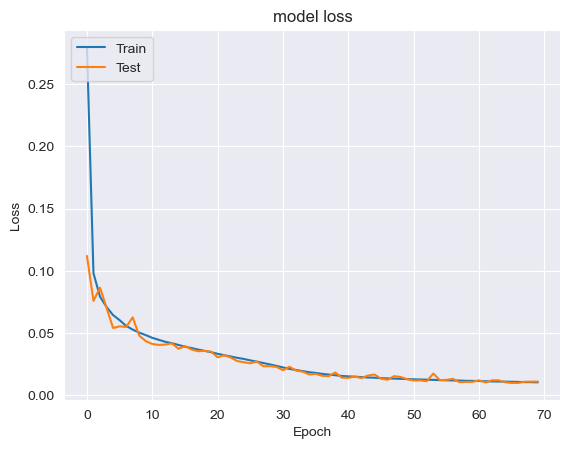

In [73]:
plot_his(history_7)

In [74]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 28s 4ms/step


In [75]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 28s 5ms/step - loss: 0.0109 - rmse: 0.0191 - mae: 0.0109 - mse: 3.6606e-04 - mape: 2382865.7500


[0.010930483229458332,
 0.019132761284708977,
 0.010930483229458332,
 0.0003660625370685011,
 2382865.75]

In [76]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 7, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [77]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11230.348


# Model 8

In [78]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='linear'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 136s 11ms/step - loss: 0.1563 - rmse: 0.5312 - mae: 0.1563 - mse: 0.2822 - mape: 26764500.0000 - val_loss: 0.0772 - val_rmse: 0.1485 - val_mae: 0.0772 - val_mse: 0.0220 - val_mape: 13099220.0000
Epoch 2/40
12436/12436 [==============================] - 135s 11ms/step - loss: 0.0747 - rmse: 0.1464 - mae: 0.0747 - mse: 0.0214 - mape: 13356435.0000 - val_loss: 0.0696 - val_rmse: 0.1429 - val_mae: 0.0696 - val_mse: 0.0204 - val_mape: 11725569.0000
Epoch 3/40
12436/12436 [==============================] - 134s 11ms/step - loss: 0.0696 - rmse: 0.1413 - mae: 0.0696 - mse: 0.0200 - mape: 12449128.0000 - val_loss: 0.0673 - val_rmse: 0.1414 - val_mae: 0.0673 - val_mse: 0.0200 - val_mape: 12873923.0000
Epoch 4/40
12436/12436 [==============================] - 134s 11ms/step - loss: 0.0664 - rmse: 0.1382 - mae: 0.0664 - mse: 0.0191 - mape: 11923810.0000 - val_loss: 0.0642 - val_rmse: 0.1366 - val_mae: 0.0642 - val_mse: 0.0187 - val_mape: 11

12436/12436 [==============================] - 146s 12ms/step - loss: 0.0468 - rmse: 0.1061 - mae: 0.0468 - mse: 0.0113 - mape: 9425984.0000 - val_loss: 0.0464 - val_rmse: 0.1060 - val_mae: 0.0464 - val_mse: 0.0112 - val_mape: 9446902.0000
Epoch 34/40
12436/12436 [==============================] - 144s 12ms/step - loss: 0.0466 - rmse: 0.1057 - mae: 0.0466 - mse: 0.0112 - mape: 9401814.0000 - val_loss: 0.0463 - val_rmse: 0.1058 - val_mae: 0.0463 - val_mse: 0.0112 - val_mape: 9622868.0000
Epoch 35/40
12436/12436 [==============================] - 144s 12ms/step - loss: 0.0463 - rmse: 0.1052 - mae: 0.0463 - mse: 0.0111 - mape: 9376364.0000 - val_loss: 0.0462 - val_rmse: 0.1053 - val_mae: 0.0462 - val_mse: 0.0111 - val_mape: 9342082.0000
Epoch 36/40
12436/12436 [==============================] - 140s 11ms/step - loss: 0.0461 - rmse: 0.1048 - mae: 0.0461 - mse: 0.0110 - mape: 9344591.0000 - val_loss: 0.0459 - val_rmse: 0.1051 - val_mae: 0.0459 - val_mse: 0.0110 - val_mape: 9578156.0000
Epoc

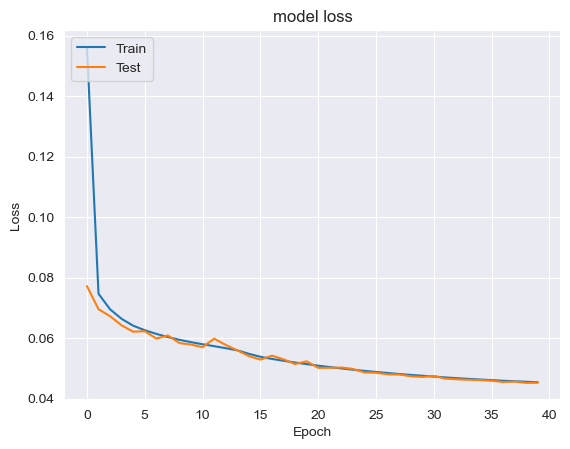

In [79]:
plot_his(history_8)

In [80]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 33s 5ms/step


In [81]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 50s 8ms/step - loss: 0.0453 - rmse: 0.1035 - mae: 0.0453 - mse: 0.0107 - mape: 9223490.0000


[0.04527442157268524,
 0.10347733646631241,
 0.04527442157268524,
 0.010707559064030647,
 9223490.0]

In [82]:
AIC_value(model_8,prediction_8,Y_test)

AIC:  65870.34


# Model 9

In [83]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0677 - rmse: 0.3861 - mae: 0.0677 - mse: 0.1491 - mape: 5618673.0000 - val_loss: 0.0281 - val_rmse: 0.0519 - val_mae: 0.0281 - val_mse: 0.0027 - val_mape: 2321808.0000
Epoch 2/50
24872/24872 [==============================] - 70s 3ms/step - loss: 0.0266 - rmse: 0.0499 - mae: 0.0266 - mse: 0.0025 - mape: 1932134.5000 - val_loss: 0.0250 - val_rmse: 0.0474 - val_mae: 0.0250 - val_mse: 0.0022 - val_mape: 1691048.0000
Epoch 3/50
24872/24872 [==============================] - 69s 3ms/step - loss: 0.0253 - rmse: 0.0472 - mae: 0.0253 - mse: 0.0022 - mape: 1780960.7500 - val_loss: 0.0246 - val_rmse: 0.0459 - val_mae: 0.0246 - val_mse: 0.0021 - val_mape: 1804370.8750
Epoch 4/50
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0246 - rmse: 0.0455 - mae: 0.0246 - mse: 0.0021 - mape: 1704529.8750 - val_loss: 0.0236 - val_rmse: 0.0442 - val_mae: 0.0236 - val_mse: 0.0020 - val_mape: 1335407.1250
Epoc

Epoch 34/50
24872/24872 [==============================] - 66s 3ms/step - loss: 0.0206 - rmse: 0.0365 - mae: 0.0206 - mse: 0.0013 - mape: 1161416.1250 - val_loss: 0.0204 - val_rmse: 0.0365 - val_mae: 0.0204 - val_mse: 0.0013 - val_mape: 1122441.6250
Epoch 35/50
24872/24872 [==============================] - 66s 3ms/step - loss: 0.0205 - rmse: 0.0364 - mae: 0.0205 - mse: 0.0013 - mape: 1149369.3750 - val_loss: 0.0204 - val_rmse: 0.0361 - val_mae: 0.0204 - val_mse: 0.0013 - val_mape: 1232393.2500
Epoch 36/50
24872/24872 [==============================] - 64s 3ms/step - loss: 0.0205 - rmse: 0.0363 - mae: 0.0205 - mse: 0.0013 - mape: 1138399.1250 - val_loss: 0.0203 - val_rmse: 0.0361 - val_mae: 0.0203 - val_mse: 0.0013 - val_mape: 1096105.7500
Epoch 37/50
24872/24872 [==============================] - 65s 3ms/step - loss: 0.0204 - rmse: 0.0362 - mae: 0.0204 - mse: 0.0013 - mape: 1127114.6250 - val_loss: 0.0202 - val_rmse: 0.0360 - val_mae: 0.0202 - val_mse: 0.0013 - val_mape: 1056226.3750


In [84]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.0186 - rmse: 0.0341 - mae: 0.0186 - mse: 0.0012 - mape: 1034800.4375


[0.01857784204185009,
 0.034091729670763016,
 0.01857784204185009,
 0.0011622459860518575,
 1034800.4375]

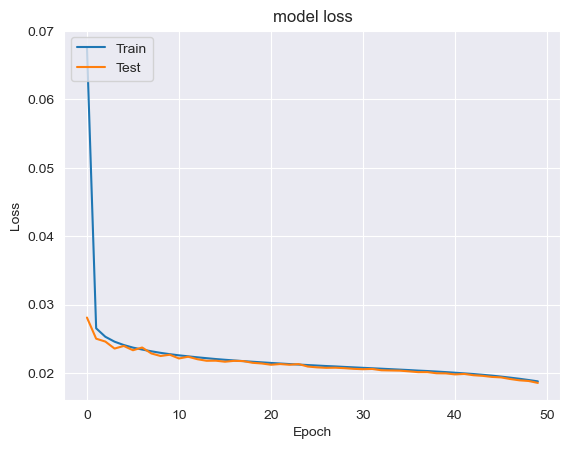

In [85]:
plot_his(history_9)

In [86]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [87]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  790.3746


# Model 10

In [88]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 74s 3ms/step - loss: 0.0447 - rmse: 0.2231 - mae: 0.0447 - mse: 0.0498 - mape: 9145646.0000 - val_loss: 0.0181 - val_rmse: 0.0275 - val_mae: 0.0181 - val_mse: 7.5396e-04 - val_mape: 3445476.0000
Epoch 2/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0171 - rmse: 0.0242 - mae: 0.0171 - mse: 5.8579e-04 - mape: 4247178.0000 - val_loss: 0.0173 - val_rmse: 0.0234 - val_mae: 0.0173 - val_mse: 5.4848e-04 - val_mape: 4363961.5000
Epoch 3/100
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0137 - rmse: 0.0205 - mae: 0.0137 - mse: 4.2063e-04 - mape: 3103161.2500 - val_loss: 0.0113 - val_rmse: 0.0188 - val_mae: 0.0113 - val_mse: 3.5264e-04 - val_mape: 1968037.7500
Epoch 4/100
24872/24872 [==============================] - 69s 3ms/step - loss: 0.0118 - rmse: 0.0187 - mae: 0.0118 - mse: 3.5115e-04 - mape: 2570064.0000 - val_loss: 0.0110 - val_rmse: 0.0179 - val_mae: 0.0110 - val_mse: 3.2041e-

Epoch 33/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0051 - rmse: 0.0133 - mae: 0.0051 - mse: 1.7649e-04 - mape: 919012.8125 - val_loss: 0.0054 - val_rmse: 0.0134 - val_mae: 0.0054 - val_mse: 1.8081e-04 - val_mape: 433520.6562
Epoch 34/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0050 - rmse: 0.0132 - mae: 0.0050 - mse: 1.7517e-04 - mape: 903304.8125 - val_loss: 0.0048 - val_rmse: 0.0132 - val_mae: 0.0048 - val_mse: 1.7390e-04 - val_mape: 799841.3125
Epoch 35/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0049 - rmse: 0.0132 - mae: 0.0049 - mse: 1.7383e-04 - mape: 889027.9375 - val_loss: 0.0047 - val_rmse: 0.0132 - val_mae: 0.0047 - val_mse: 1.7432e-04 - val_mape: 1054432.5000
Epoch 36/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0049 - rmse: 0.0131 - mae: 0.0049 - mse: 1.7213e-04 - mape: 878870.1250 - val_loss: 0.0050 - val_rmse: 0.0131 - val_mae: 0.0050 - val_mse: 1.7264

Epoch 65/100
24872/24872 [==============================] - 70s 3ms/step - loss: 0.0042 - rmse: 0.0123 - mae: 0.0042 - mse: 1.5212e-04 - mape: 868104.5625 - val_loss: 0.0044 - val_rmse: 0.0125 - val_mae: 0.0044 - val_mse: 1.5577e-04 - val_mape: 1077920.7500
Epoch 66/100
24872/24872 [==============================] - 69s 3ms/step - loss: 0.0042 - rmse: 0.0123 - mae: 0.0042 - mse: 1.5168e-04 - mape: 871679.4375 - val_loss: 0.0040 - val_rmse: 0.0124 - val_mae: 0.0040 - val_mse: 1.5346e-04 - val_mape: 929399.8750
Epoch 67/100
24872/24872 [==============================] - 70s 3ms/step - loss: 0.0041 - rmse: 0.0123 - mae: 0.0041 - mse: 1.5112e-04 - mape: 868611.3750 - val_loss: 0.0041 - val_rmse: 0.0124 - val_mae: 0.0041 - val_mse: 1.5469e-04 - val_mape: 983764.0000
Epoch 68/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.0041 - rmse: 0.0123 - mae: 0.0041 - mse: 1.5115e-04 - mape: 875098.5000 - val_loss: 0.0041 - val_rmse: 0.0124 - val_mae: 0.0041 - val_mse: 1.5311

Epoch 97/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0040 - rmse: 0.0120 - mae: 0.0040 - mse: 1.4469e-04 - mape: 900235.1250 - val_loss: 0.0040 - val_rmse: 0.0122 - val_mae: 0.0040 - val_mse: 1.4827e-04 - val_mape: 1010029.7500
Epoch 98/100
24872/24872 [==============================] - 86s 3ms/step - loss: 0.0039 - rmse: 0.0120 - mae: 0.0039 - mse: 1.4446e-04 - mape: 904703.5000 - val_loss: 0.0041 - val_rmse: 0.0121 - val_mae: 0.0041 - val_mse: 1.4661e-04 - val_mape: 797165.3750
Epoch 99/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0039 - rmse: 0.0120 - mae: 0.0039 - mse: 1.4437e-04 - mape: 904421.5625 - val_loss: 0.0040 - val_rmse: 0.0122 - val_mae: 0.0040 - val_mse: 1.4802e-04 - val_mape: 1014373.6250
Epoch 100/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0039 - rmse: 0.0120 - mae: 0.0039 - mse: 1.4420e-04 - mape: 904416.3125 - val_loss: 0.0039 - val_rmse: 0.0121 - val_mae: 0.0039 - val_mse: 1.45

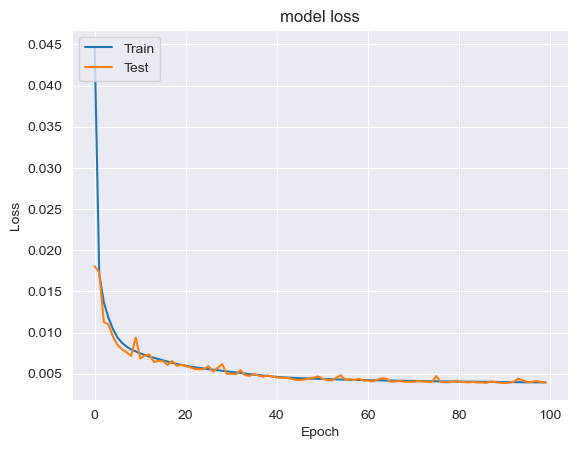

In [89]:
plot_his(history_10)

In [90]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 0.0039 - rmse: 0.0121 - mae: 0.0039 - mse: 1.4583e-04 - mape: 867297.4375


[0.003910593688488007,
 0.01207596343010664,
 0.003910593688488007,
 0.0001458288897993043,
 867297.4375]

In [91]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


In [92]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  2790.3552


# Model 11

In [93]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 81s 3ms/step - loss: 0.2060 - rmse: 0.6620 - mae: 0.2060 - mse: 0.4383 - mape: 39095352.0000 - val_loss: 0.0663 - val_rmse: 0.1292 - val_mae: 0.0663 - val_mse: 0.0167 - val_mape: 9488009.0000
Epoch 2/100
24872/24872 [==============================] - 82s 3ms/step - loss: 0.0547 - rmse: 0.1088 - mae: 0.0547 - mse: 0.0118 - mape: 7725384.0000 - val_loss: 0.0477 - val_rmse: 0.0972 - val_mae: 0.0477 - val_mse: 0.0094 - val_mape: 7942577.0000
Epoch 3/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0436 - rmse: 0.0912 - mae: 0.0436 - mse: 0.0083 - mape: 6142585.0000 - val_loss: 0.0410 - val_rmse: 0.0871 - val_mae: 0.0410 - val_mse: 0.0076 - val_mape: 6295510.5000
Epoch 4/100
24872/24872 [==============================] - 82s 3ms/step - loss: 0.0387 - rmse: 0.0820 - mae: 0.0387 - mse: 0.0067 - mape: 5197535.5000 - val_loss: 0.0367 - val_rmse: 0.0783 - val_mae: 0.0367 - val_mse: 0.0061 - val_mape: 4596283.5000

Epoch 34/100
24872/24872 [==============================] - 102s 4ms/step - loss: 0.0230 - rmse: 0.0450 - mae: 0.0230 - mse: 0.0020 - mape: 2155940.2500 - val_loss: 0.0230 - val_rmse: 0.0451 - val_mae: 0.0230 - val_mse: 0.0020 - val_mape: 2005858.6250
Epoch 35/100
24872/24872 [==============================] - 107s 4ms/step - loss: 0.0229 - rmse: 0.0448 - mae: 0.0229 - mse: 0.0020 - mape: 2130029.0000 - val_loss: 0.0229 - val_rmse: 0.0449 - val_mae: 0.0229 - val_mse: 0.0020 - val_mape: 2166234.2500
Epoch 36/100
24872/24872 [==============================] - 106s 4ms/step - loss: 0.0228 - rmse: 0.0446 - mae: 0.0228 - mse: 0.0020 - mape: 2106769.2500 - val_loss: 0.0228 - val_rmse: 0.0447 - val_mae: 0.0228 - val_mse: 0.0020 - val_mape: 2107786.5000
Epoch 37/100
24872/24872 [==============================] - 103s 4ms/step - loss: 0.0228 - rmse: 0.0444 - mae: 0.0228 - mse: 0.0020 - mape: 2082837.2500 - val_loss: 0.0228 - val_rmse: 0.0445 - val_mae: 0.0228 - val_mse: 0.0020 - val_mape: 23152

Epoch 67/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0214 - rmse: 0.0408 - mae: 0.0214 - mse: 0.0017 - mape: 1600795.6250 - val_loss: 0.0214 - val_rmse: 0.0407 - val_mae: 0.0214 - val_mse: 0.0017 - val_mape: 1676442.7500
Epoch 68/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0214 - rmse: 0.0407 - mae: 0.0214 - mse: 0.0017 - mape: 1590660.8750 - val_loss: 0.0213 - val_rmse: 0.0406 - val_mae: 0.0213 - val_mse: 0.0017 - val_mape: 1559400.3750
Epoch 69/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0214 - rmse: 0.0406 - mae: 0.0214 - mse: 0.0016 - mape: 1579293.1250 - val_loss: 0.0213 - val_rmse: 0.0406 - val_mae: 0.0213 - val_mse: 0.0016 - val_mape: 1520714.3750
Epoch 70/100
24872/24872 [==============================] - 85s 3ms/step - loss: 0.0213 - rmse: 0.0405 - mae: 0.0213 - mse: 0.0016 - mape: 1570104.8750 - val_loss: 0.0213 - val_rmse: 0.0405 - val_mae: 0.0213 - val_mse: 0.0016 - val_mape: 1608224.7

Epoch 100/100
24872/24872 [==============================] - 75s 3ms/step - loss: 0.0207 - rmse: 0.0391 - mae: 0.0207 - mse: 0.0015 - mape: 1341351.3750 - val_loss: 0.0207 - val_rmse: 0.0389 - val_mae: 0.0207 - val_mse: 0.0015 - val_mape: 1353886.3750
CPU times: total: 3h 45min 29s
Wall time: 2h 15min 56s


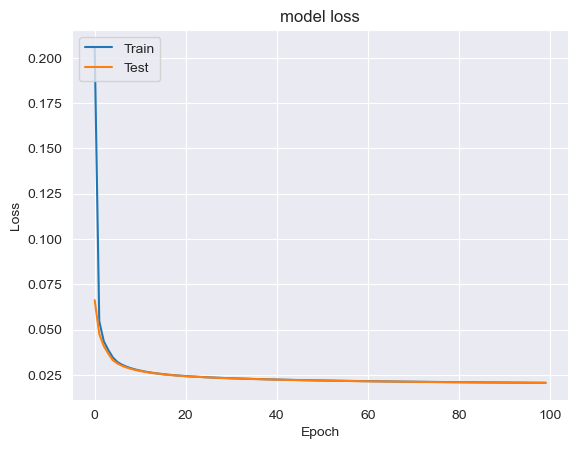

In [94]:
plot_his(history_11)

In [95]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.0207 - rmse: 0.0389 - mae: 0.0207 - mse: 0.0015 - mape: 1353886.3750


[0.02065287157893181,
 0.038949787616729736,
 0.02065287157893181,
 0.0015170860569924116,
 1353886.375]

In [96]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [97]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  13790.332


# Model 12

In [98]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 69s 3ms/step - loss: 0.2141 - rmse: 0.3851 - mae: 0.2141 - mse: 0.1483 - mape: 40230980.0000 - val_loss: 0.1947 - val_rmse: 0.3021 - val_mae: 0.1947 - val_mse: 0.0913 - val_mape: 32625124.0000
Epoch 2/100
24872/24872 [==============================] - 71s 3ms/step - loss: 0.1974 - rmse: 0.3063 - mae: 0.1974 - mse: 0.0938 - mape: 35353420.0000 - val_loss: 0.2001 - val_rmse: 0.2975 - val_mae: 0.2001 - val_mse: 0.0885 - val_mape: 42041208.0000
Epoch 3/100
24872/24872 [==============================] - 64s 3ms/step - loss: 0.1965 - rmse: 0.3061 - mae: 0.1965 - mse: 0.0937 - mape: 34562244.0000 - val_loss: 0.1945 - val_rmse: 0.3008 - val_mae: 0.1945 - val_mse: 0.0905 - val_mape: 33586140.0000
Epoch 4/100
24872/24872 [==============================] - 54s 2ms/step - loss: 0.1960 - rmse: 0.3060 - mae: 0.1960 - mse: 0.0936 - mape: 34201868.0000 - val_loss: 0.1972 - val_rmse: 0.3045 - val_mae: 0.1972 - val_mse: 0.0927 - val_mape: 400709

24872/24872 [==============================] - 48s 2ms/step - loss: 0.1949 - rmse: 0.3054 - mae: 0.1949 - mse: 0.0933 - mape: 33194220.0000 - val_loss: 0.1946 - val_rmse: 0.3054 - val_mae: 0.1946 - val_mse: 0.0932 - val_mape: 34189784.0000
Epoch 34/100
24872/24872 [==============================] - 49s 2ms/step - loss: 0.1949 - rmse: 0.3054 - mae: 0.1949 - mse: 0.0932 - mape: 33216724.0000 - val_loss: 0.1944 - val_rmse: 0.3035 - val_mae: 0.1944 - val_mse: 0.0921 - val_mape: 33583188.0000
Epoch 35/100
24872/24872 [==============================] - 47s 2ms/step - loss: 0.1949 - rmse: 0.3053 - mae: 0.1949 - mse: 0.0932 - mape: 33202302.0000 - val_loss: 0.1945 - val_rmse: 0.3051 - val_mae: 0.1945 - val_mse: 0.0931 - val_mape: 32950416.0000
Epoch 36/100
24872/24872 [==============================] - 49s 2ms/step - loss: 0.1949 - rmse: 0.3052 - mae: 0.1949 - mse: 0.0932 - mape: 33240566.0000 - val_loss: 0.1944 - val_rmse: 0.3056 - val_mae: 0.1944 - val_mse: 0.0934 - val_mape: 33626192.0000
E

24872/24872 [==============================] - 50s 2ms/step - loss: 0.1948 - rmse: 0.3053 - mae: 0.1948 - mse: 0.0932 - mape: 33179444.0000 - val_loss: 0.1946 - val_rmse: 0.3054 - val_mae: 0.1946 - val_mse: 0.0932 - val_mape: 34980672.0000
Epoch 66/100
24872/24872 [==============================] - 48s 2ms/step - loss: 0.1948 - rmse: 0.3053 - mae: 0.1948 - mse: 0.0932 - mape: 33186348.0000 - val_loss: 0.1944 - val_rmse: 0.3039 - val_mae: 0.1944 - val_mse: 0.0924 - val_mape: 33818740.0000
Epoch 67/100
24872/24872 [==============================] - 48s 2ms/step - loss: 0.1948 - rmse: 0.3051 - mae: 0.1948 - mse: 0.0931 - mape: 33191844.0000 - val_loss: 0.1944 - val_rmse: 0.3063 - val_mae: 0.1944 - val_mse: 0.0938 - val_mape: 33355758.0000
Epoch 68/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.1948 - rmse: 0.3052 - mae: 0.1948 - mse: 0.0932 - mape: 33181998.0000 - val_loss: 0.1944 - val_rmse: 0.3052 - val_mae: 0.1944 - val_mse: 0.0931 - val_mape: 33632816.0000
E

24872/24872 [==============================] - 47s 2ms/step - loss: 0.1948 - rmse: 0.3051 - mae: 0.1948 - mse: 0.0931 - mape: 33152056.0000 - val_loss: 0.1946 - val_rmse: 0.3074 - val_mae: 0.1946 - val_mse: 0.0945 - val_mape: 34883408.0000
Epoch 98/100
24872/24872 [==============================] - 46s 2ms/step - loss: 0.1948 - rmse: 0.3054 - mae: 0.1948 - mse: 0.0933 - mape: 33177302.0000 - val_loss: 0.1945 - val_rmse: 0.3051 - val_mae: 0.1945 - val_mse: 0.0931 - val_mape: 31907100.0000
Epoch 99/100
24872/24872 [==============================] - 47s 2ms/step - loss: 0.1948 - rmse: 0.3052 - mae: 0.1948 - mse: 0.0931 - mape: 33183160.0000 - val_loss: 0.1944 - val_rmse: 0.3045 - val_mae: 0.1944 - val_mse: 0.0927 - val_mape: 33488146.0000
Epoch 100/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.1948 - rmse: 0.3052 - mae: 0.1948 - mse: 0.0931 - mape: 33168564.0000 - val_loss: 0.1944 - val_rmse: 0.3051 - val_mae: 0.1944 - val_mse: 0.0931 - val_mape: 32904818.0000


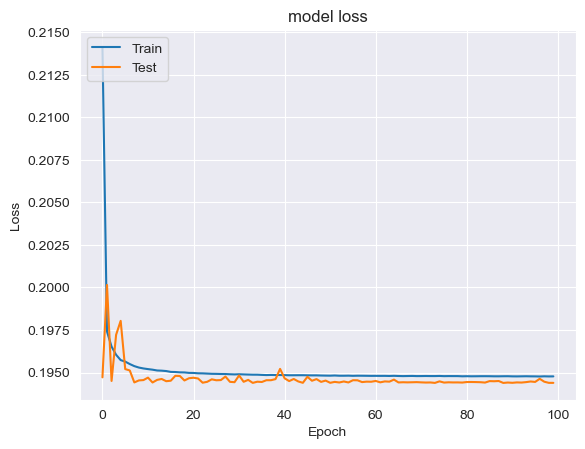

In [99]:
plot_his(history_12)

In [100]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.1944 - rmse: 0.3051 - mae: 0.1944 - mse: 0.0931 - mape: 32904818.0000


[0.19439250230789185,
 0.3050609827041626,
 0.19439250230789185,
 0.09306219965219498,
 32904818.0]

In [101]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 6s 966us/step


In [102]:
AIC_value(model_12,prediction_12,Y_test)

AIC:  1666.8983


In [104]:
model_1.save('Saved_models/model_1_Poweresti.h5')

In [105]:
model_2.save('Saved_models/model_2_Poweresti.h5')

In [106]:
model_3.save('Saved_models/model_3_Poweresti.h5')

In [107]:
model_4.save('Saved_models/model_4_Poweresti.h5')

In [108]:
model_5.save('Saved_models/model_5_Poweresti.h5')

In [109]:
model_6.save('Saved_models/model_6_Poweresti.h5')

In [110]:
model_7.save('Saved_models/model_7_Poweresti.h5')

In [111]:
model_8.save('Saved_models/model_8_Poweresti.h5')

In [112]:
model_9.save('Saved_models/model_9_Poweresti.h5')

In [113]:
model_10.save('Saved_models/model_10_Poweresti.h5')

In [114]:
model_11.save('Saved_models/model_11_Poweresti.h5')

In [115]:
model_12.save('Saved_models/model_12_Poweresti.h5')